In [15]:
import pandas as pd
import re
df = pd.read_csv('/opt/ml/project2/level2_klue_nlp-level2-nlp-01/dataset/train/new_train_split.csv')
df

,id,sentence,subject_entity,object_entity,label,source
0,4789,가수 로이킴(김상우·26)의 음란물 유포 혐의 '비하인드 스토리'가 공개됐다.,"{'word': '로이킴', 'start_idx': 3, 'end_idx': 5, ...","{'word': '김상우', 'start_idx': 7, 'end_idx': 9, ...",per:alternate_names,wikitree
1,25364,자키 흐루넌은 2011년부터 2014년까지 FCR 2001 뒤스부르크에서 선수 생활...,"{'word': '자키 흐루넌', 'start_idx': 0, 'end_idx': ...","{'word': 'FCR 2001 뒤스부르크', 'start_idx': 24, 'e...",no_relation,wikipedia
2,13050,"특히, 이날 행사에는 문재인 대통령 부인 김정숙 여사가 현직 대통령 부인으로는 처음...","{'word': '김정숙', 'start_idx': 23, 'end_idx': 25...","{'word': '문재인', 'start_idx': 12, 'end_idx': 14...",per:spouse,wikitree
3,3113,버킹검 공작 헨리 스태퍼드는 부계쪽으로 제1대 랭커스터 공작 곤트의 존과 제1대 글...,"{'word': '곤트의 존', 'start_idx': 34, 'end_idx': ...","{'word': '랭커스터', 'start_idx': 26, 'end_idx': 2...",per:origin,wikipedia
4,1696,명현관 군수는 “올해 해남군은 농민수당의 도입으로 우리나라 농업정책의 패러다임 전환...,"{'word': '해남군', 'start_idx': 12, 'end_idx': 14...","{'word': '명현관', 'start_idx': 0, 'end_idx': 2, ...",org:top_members/employees,wikitree
...,...,...,...,...,...,...
29176,6421,피피노와의 결별 직후 클룸은 레드 핫 칠리 페퍼스의 보컬인 앤서니 키에디스(Anth...,"{'word': '앤서니 키에디스', 'start_idx': 33, 'end_idx...","{'word': 'Anthony Kiedis', 'start_idx': 42, 'e...",per:alternate_names,wikipedia
29177,8826,경기 포천시(시장 박윤국)는 지난 24일 시청 대회의실에서 '2019년 포천시 우수...,"{'word': '포천시', 'start_idx': 3, 'end_idx': 5, ...","{'word': '박윤국', 'start_idx': 10, 'end_idx': 12...",org:top_members/employees,wikitree
29178,29419,그의 첫 번째 부인은 류리크 왕조 키예프 대공국의 스뱌토폴크 2세의 딸 즈비슬라바(...,"{'word': '스뱌토폴크 2세', 'start_idx': 28, 'end_idx...","{'word': '류리크 왕조', 'start_idx': 12, 'end_idx':...",per:origin,wikipedia
29179,28813,또 타블로·강혜정 부부는 딸과 함께 고창의 갯벌에서 조개캐기 체험을 하면서 체험장에...,"{'word': '강혜정', 'start_idx': 6, 'end_idx': 8, ...","{'word': '타블로', 'start_idx': 2, 'end_idx': 4, ...",per:spouse,wikitree


In [16]:
# """" 날리기도 해보자.

### entity들이 sentence에 있는지 확인

In [17]:
for sen, sub, obj in zip(df['sentence'], df['subject_entity'], df['object_entity']):
    sub = eval(sub)
    obj = eval(obj)
    sub_word=sub['word']
    obj_word=obj['word']
    if sub_word not in sen:
        print(sen)
        print(sub_word)
    if obj_word not in sen:
        print(sen)
        print(obj_word)

### ㈜ 확인

In [18]:
cnt=0
for sen, sub, obj in zip(df['sentence'], df['subject_entity'], df['object_entity']):
    sub = eval(sub)
    obj = eval(obj)
    sub_word=sub['word']
    obj_word=obj['word']
    if "㈜" in (sen or sub_word or obj_word):
        cnt+=1
print(cnt)

126


### ㈜ -> (주)

In [19]:
idx=0
for sen, sub, obj in zip(df['sentence'], df['subject_entity'], df['object_entity']):
    sub2 = eval(sub)
    obj2 = eval(obj)
    sub_word=sub2['word']
    obj_word=obj2['word']
    if "㈜" in sen:
        sen=sen.replace("㈜","(주)")
        df['sentence'][idx]=sen
    if "㈜" in sub_word:
        sub=sub.replace("㈜","(주)")
        df['subject_entity'][idx]=sub
    if "㈜" in obj_word:
        obj=obj.replace("㈜","(주)")
        df['object_entity'][idx]=obj
    idx+=1

<ipython-input-19-6b804347e861>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][idx]=sen
<ipython-input-19-6b804347e861>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['object_entity'][idx]=obj


### 표현식에서 중복 괄호를 찾기. 어떻게 처리해야 할까? ->  일단 '(' , ')'를 '<', '>'로 바꾸자 -> 문장에 entity 없는 경우를 확인하여 다시 처리해줌

In [20]:
save=[]
def test(exp):
    check=0
    for c in exp:
        if c=='(':
            if(check==0):
                check=1
            else:
                return True
        elif c==')':
            check=0
    return False

idx=0
for sen, sub, obj,lb in zip(df['sentence'], df['subject_entity'], df['object_entity'], df['label']):
    if(test(sen)==True):
        sen=sen.replace("(","<")
        sen=sen.replace(")",">")
        df['sentence'][idx]=sen
        temp2=[]
        temp2.append(sen)
        temp2.append(lb)
        save.append(temp2)
    idx+=1
df2= pd.DataFrame(save)
df2

<ipython-input-20-b3b09205cce6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][idx]=sen


,0,1
0,"하용조<河用祚, 1946년 <음력><음력> 9월 20일 ~ 2011년 8월 2일>는...",org:member_of
1,"전태일<全泰壹, 1948년 9월 28일 <1948년 음력 8월 26일><1948년 ...",per:title
2,"2014 시즌이 끝나자 FA 기간을 통해서 내부 1명<김경언>과 외부 3명<권혁, ...",per:employee_of
3,1988년 8월에 헝가리와의 상주대표부 설치협정 체결<1988년 10월 헝가리의 수...,org:members
4,"한동수<韓東洙, 1949년 1월 1일 <1948년 음력 12월 3일><1948년 음...",per:title
...,...,...
195,"사이타마현 카스카베 시를 배경{한국어판에서는<SBS, 투니버스 기준> 서울특별시 금...",per:place_of_residence
196,"정세균<丁世均, 1950년 11월 5일<음력 9월 26일><음력 9월 26일> ~ ...",per:date_of_birth
197,"조중응<趙重應, 1860년 11월 4일<음력 9월 22일><음력 9월 22일> ~ ...",per:date_of_birth
198,에이코인<간에이 원년<1624년><1624년> - 쇼토쿠 원년 10월 11일<171...,per:origin


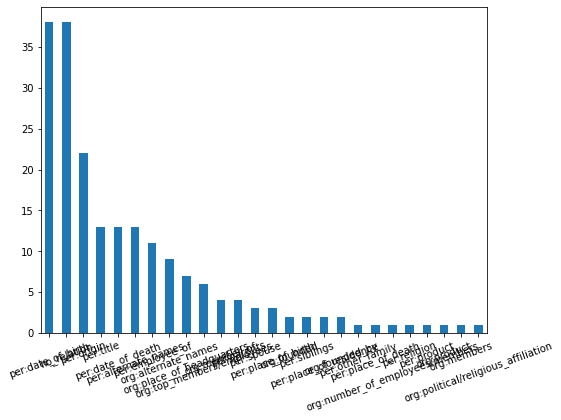

In [21]:
from matplotlib import pyplot as plt
def draw_graph(df2):
    # label의 분포
    df2[1].value_counts().plot(kind='bar', rot=20, figsize=(8, 6))
    plt.show()
draw_graph(df2)

### ㈜ -> (주) 처리후 entity들이 sentence에 있는지 확인

In [22]:
for sen, sub, obj in zip(df['sentence'], df['subject_entity'], df['object_entity']):
    sub = eval(sub)
    obj = eval(obj)
    sub_word=sub['word']
    obj_word=obj['word']
    if sub_word not in sen:
        print(sen)
        print(sub_word)
    if obj_word not in sen:
        print(sen)
        print(obj_word)

쩐 영종<바오푸<寶符><寶符> 4년 9월 17일<1276년 10월 27일> ~ 다이카인<大慶> 7년 3월 16일<1320년 4월 24일>>은 베트남 쩐 왕조의 제4대 황제<재위 : 1293년 ~ 1314년>이다.
다이카인(大慶) 7년 3월 16일(1320년 4월 24일)
그룹 에프엑스<f<x><x>> 멤버 엠버가 SM엔터테인먼트를 떠난다.
f(x)
우키타 히데이에<겐키 3년<1572년><1572년> ~ 메이레키 원년<1655년 12월 17일>>는 아즈치모모야마 시대의 비젠 오카야마성 다이묘이다.
겐키 3년(1572년)
광서제<光緖帝, 동치<同治><同治> 10년 6월 28일<1871년 8월 14일> ~ 광서<光緖> 34년 10월 21일<1908년 11월 14일>>는 청나라의 제11대 황제이다.
광서(光緖) 34년 10월 21일(1908년 11월 14일)
우키타 히데이에<겐키 3년<1572년><1572년> ~ 메이레키 원년<1655년 12월 17일>>는 아즈치모모야마 시대의 비젠 오카야마성 다이묘이다.
메이레키 원년(1655년 12월 17일)
홍희제<洪熙帝, 홍무<洪武><洪武> 11년 7월 23일<1378년 8월 16일> ~ 홍희<洪熙> 원년 5월 12일<1425년 5월 29일>>는 중국 명나라의 제4대 황제<재위 1424년~1425년>이다.
홍희(洪熙) 원년 5월 12일(1425년 5월 29일)
'미지수'는 설리가 속해있던 그룹 '에프엑스<f<x><x>>'를 나타내며 포근한 이불은 종현 '하루의 끝' 가사에 등장한다.
f(x)
박종홍<朴鍾鴻, 1903년 8월 23일<1903년 음력 7월 1일><1903년 음력 7월 1일> 대한제국 평안남도 평양 출생 ~ 1976년 3월 17일 대한민국 서울에서 별세.>은 대한민국의 교육자, 철학자, 사상가이며, 호<號>는 열암<冽巖>이다.
열암(冽巖)
미즈하라 코요미<보통 요미<よみ><よみ>로 불린다, 한국어 더빙판은 박재경>는 일본의 애니메이션과 만화 시리즈 《아즈망가 대왕》에 등장하는 인물이다.
요미(よみ)


### 괄호 날리기 테스트

In [23]:
def remove_paren(sen,sub,obj):
    items = re.findall('\(([^)]+)', sen) 
    test=list(re.finditer('\(([^)]+)', sen))
    save=[]
    iterator = re.finditer('\(([^)]+)' ,sen)
    for match in iterator:
        temp=[]
        temp.append(match.start())
        temp.append(match.end())
        save.append(temp)
    
    #save는 items에 들어있는 문자열의 시작/끝 index가 들어있음
    
    for idx, i in enumerate(items):
        if not sub in i and not obj in i and not i in sub and not i in obj: #괄호 날림. @로 바꿔줌
            j=""
            for x in range(save[idx][1]-save[idx][0]+1):
                j+="@"
            sen =sen[:save[idx][0]] + j + sen[save[idx][1]+1:]
    sen=sen.replace("@","")
    return sen

In [24]:
sen_test="한국동서발전(주)(사장 박일준)는 9일(월) 본사(울산 중구 소재) 및 울산 농수산"
sub_test="한국동서발전(주)"
obj_test="박일준"
print(sen_test)
print(remove_paren(sen_test,sub_test,obj_test))

한국동서발전(주)(사장 박일준)는 9일(월) 본사(울산 중구 소재) 및 울산 농수산
한국동서발전(주)(사장 박일준)는 9일 본사 및 울산 농수산


In [25]:
#한국동서발전(주)(사장 박일준)는 9일(월) 본사(울산 중구 소재) 및 울산 농수산
save=[]

idx=0
cnt=0
for sen, sub, obj in zip(df['sentence'], df['subject_entity'], df['object_entity']):

    #items = re.findall('\(([^)]+)', sen) #괄호 안에 있는 문자열
    sub = eval(sub)
    obj = eval(obj)
    sub_word=sub['word']
    obj_word=obj['word']
    
    df['sentence'][idx]=remove_paren(sen,sub_word,obj_word)
    
    idx+=1
                
df2= pd.DataFrame(df)
df2

<ipython-input-25-b598f74bee8c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][idx]=remove_paren(sen,sub_word,obj_word)


,id,sentence,subject_entity,object_entity,label,source
0,4789,가수 로이킴(김상우·26)의 음란물 유포 혐의 '비하인드 스토리'가 공개됐다.,"{'word': '로이킴', 'start_idx': 3, 'end_idx': 5, ...","{'word': '김상우', 'start_idx': 7, 'end_idx': 9, ...",per:alternate_names,wikitree
1,25364,자키 흐루넌은 2011년부터 2014년까지 FCR 2001 뒤스부르크에서 선수 생활...,"{'word': '자키 흐루넌', 'start_idx': 0, 'end_idx': ...","{'word': 'FCR 2001 뒤스부르크', 'start_idx': 24, 'e...",no_relation,wikipedia
2,13050,"특히, 이날 행사에는 문재인 대통령 부인 김정숙 여사가 현직 대통령 부인으로는 처음...","{'word': '김정숙', 'start_idx': 23, 'end_idx': 25...","{'word': '문재인', 'start_idx': 12, 'end_idx': 14...",per:spouse,wikitree
3,3113,버킹검 공작 헨리 스태퍼드는 부계쪽으로 제1대 랭커스터 공작 곤트의 존과 제1대 글...,"{'word': '곤트의 존', 'start_idx': 34, 'end_idx': ...","{'word': '랭커스터', 'start_idx': 26, 'end_idx': 2...",per:origin,wikipedia
4,1696,명현관 군수는 “올해 해남군은 농민수당의 도입으로 우리나라 농업정책의 패러다임 전환...,"{'word': '해남군', 'start_idx': 12, 'end_idx': 14...","{'word': '명현관', 'start_idx': 0, 'end_idx': 2, ...",org:top_members/employees,wikitree
...,...,...,...,...,...,...
29176,6421,피피노와의 결별 직후 클룸은 레드 핫 칠리 페퍼스의 보컬인 앤서니 키에디스(Anth...,"{'word': '앤서니 키에디스', 'start_idx': 33, 'end_idx...","{'word': 'Anthony Kiedis', 'start_idx': 42, 'e...",per:alternate_names,wikipedia
29177,8826,경기 포천시(시장 박윤국)는 지난 24일 시청 대회의실에서 '2019년 포천시 우수...,"{'word': '포천시', 'start_idx': 3, 'end_idx': 5, ...","{'word': '박윤국', 'start_idx': 10, 'end_idx': 12...",org:top_members/employees,wikitree
29178,29419,그의 첫 번째 부인은 류리크 왕조 키예프 대공국의 스뱌토폴크 2세의 딸 즈비슬라바였다.,"{'word': '스뱌토폴크 2세', 'start_idx': 28, 'end_idx...","{'word': '류리크 왕조', 'start_idx': 12, 'end_idx':...",per:origin,wikipedia
29179,28813,또 타블로·강혜정 부부는 딸과 함께 고창의 갯벌에서 조개캐기 체험을 하면서 체험장에...,"{'word': '강혜정', 'start_idx': 6, 'end_idx': 8, ...","{'word': '타블로', 'start_idx': 2, 'end_idx': 4, ...",per:spouse,wikitree


### 괄호 날린후 entity들이 sentence에 있는지 확인 -> '<', '>'를 '(', ')'로 바꾸자

In [26]:
idx=0
for sen, sub, obj in zip(df['sentence'], df['subject_entity'], df['object_entity']):
    sub = eval(sub)
    obj = eval(obj)
    sub_word=sub['word']
    obj_word=obj['word']
    if sub_word not in sen:
        print(sen)
        print(sub_word)
        sen=sen.replace("<","(")
        sen=sen.replace(">",")")
        df['sentence'][idx]=sen
    if obj_word not in sen:
        print(sen)
        print(obj_word)
        sen=sen.replace("<","(")
        sen=sen.replace(">",")")
        df['sentence'][idx]=sen
    idx+=1

쩐 영종<바오푸<寶符><寶符> 4년 9월 17일<1276년 10월 27일> ~ 다이카인<大慶> 7년 3월 16일<1320년 4월 24일>>은 베트남 쩐 왕조의 제4대 황제<재위 : 1293년 ~ 1314년>이다.
다이카인(大慶) 7년 3월 16일(1320년 4월 24일)
그룹 에프엑스<f<x><x>> 멤버 엠버가 SM엔터테인먼트를 떠난다.
f(x)


<ipython-input-26-98892bbb3f1d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][idx]=sen
<ipython-input-26-98892bbb3f1d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][idx]=sen


우키타 히데이에<겐키 3년<1572년><1572년> ~ 메이레키 원년<1655년 12월 17일>>는 아즈치모모야마 시대의 비젠 오카야마성 다이묘이다.
겐키 3년(1572년)
광서제<光緖帝, 동치<同治><同治> 10년 6월 28일<1871년 8월 14일> ~ 광서<光緖> 34년 10월 21일<1908년 11월 14일>>는 청나라의 제11대 황제이다.
광서(光緖) 34년 10월 21일(1908년 11월 14일)
우키타 히데이에<겐키 3년<1572년><1572년> ~ 메이레키 원년<1655년 12월 17일>>는 아즈치모모야마 시대의 비젠 오카야마성 다이묘이다.
메이레키 원년(1655년 12월 17일)
홍희제<洪熙帝, 홍무<洪武><洪武> 11년 7월 23일<1378년 8월 16일> ~ 홍희<洪熙> 원년 5월 12일<1425년 5월 29일>>는 중국 명나라의 제4대 황제<재위 1424년~1425년>이다.
홍희(洪熙) 원년 5월 12일(1425년 5월 29일)
'미지수'는 설리가 속해있던 그룹 '에프엑스<f<x><x>>'를 나타내며 포근한 이불은 종현 '하루의 끝' 가사에 등장한다.
f(x)
박종홍<朴鍾鴻, 1903년 8월 23일<1903년 음력 7월 1일><1903년 음력 7월 1일> 대한제국 평안남도 평양 출생 ~ 1976년 3월 17일 대한민국 서울에서 별세.>은 대한민국의 교육자, 철학자, 사상가이며, 호<號>는 열암<冽巖>이다.
열암(冽巖)
미즈하라 코요미<보통 요미<よみ><よみ>로 불린다, 한국어 더빙판은 박재경>는 일본의 애니메이션과 만화 시리즈 《아즈망가 대왕》에 등장하는 인물이다.
요미(よみ)


### 마지막으로 한 번 더 확인

In [27]:
for sen, sub, obj in zip(df['sentence'], df['subject_entity'], df['object_entity']):
    sub = eval(sub)
    obj = eval(obj)
    sub_word=sub['word']
    obj_word=obj['word']
    if sub_word not in sen:
        print(sen)
        print(sub_word)
    if obj_word not in sen:
        print(sen)
        print(obj_word)

In [28]:
df.to_csv('/opt/ml/project2/level2_klue_nlp-level2-nlp-01/dataset/train/paren_new_train_split.csv', index=False)